In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


#Objective: Use a Logistic Regression to identify when a company might go bankrupt.

##Importing the Dataset

In [4]:
!wget https://raw.githubusercontent.com/JudeIbeekeocha/Database_Repo/main/data%202.csv

--2024-07-17 09:01:39--  https://raw.githubusercontent.com/JudeIbeekeocha/Database_Repo/main/data%202.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11456101 (11M) [text/plain]
Saving to: ‘data 2.csv’

data 2.csv          100%[===================>]  10.92M  --.-KB/s    in 0.1s    

2024-07-17 09:01:40 (78.6 MB/s) - ‘data 2.csv’ saved [11456101/11456101]



In [5]:
data = pd.read_csv('data 2.csv').iloc[:, :11] # Using the first 11 values

In [6]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663


##Data Analysis

In [7]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# No null values
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
dtype: int64

In [9]:
print('The amount of bankrupt companies:', (data['Bankrupt?'] == 1).sum())
print('The amount of non-bankrupt companies:', (data['Bankrupt?'] == 0).sum())

The amount of bankrupt companies: 220
The amount of non-bankrupt companies: 6599


<Axes: xlabel='Bankrupt?'>

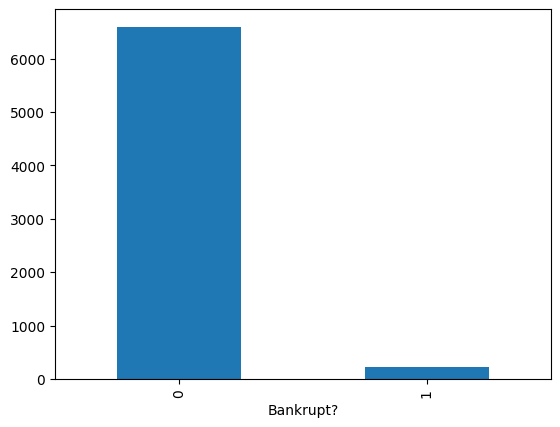

In [10]:
data['Bankrupt?'].value_counts().plot(kind= 'bar')

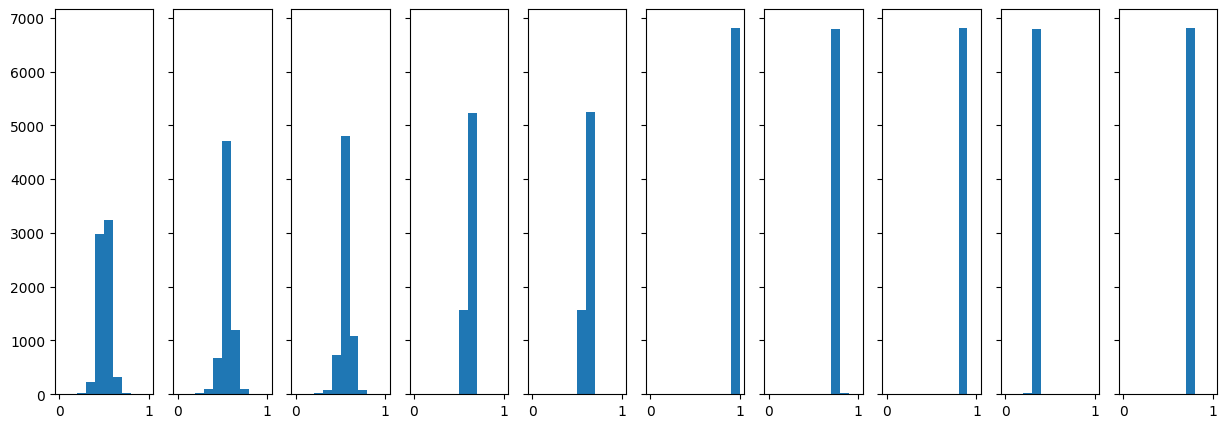

In [11]:
fig, ax = plt.subplots(1, len(data.columns) - 1, sharey=True, figsize = (15, 5))

for i, col in enumerate([i for i in data.columns if i != 'Bankrupt?']):
  ax[i].hist(data[col], bins = 10)

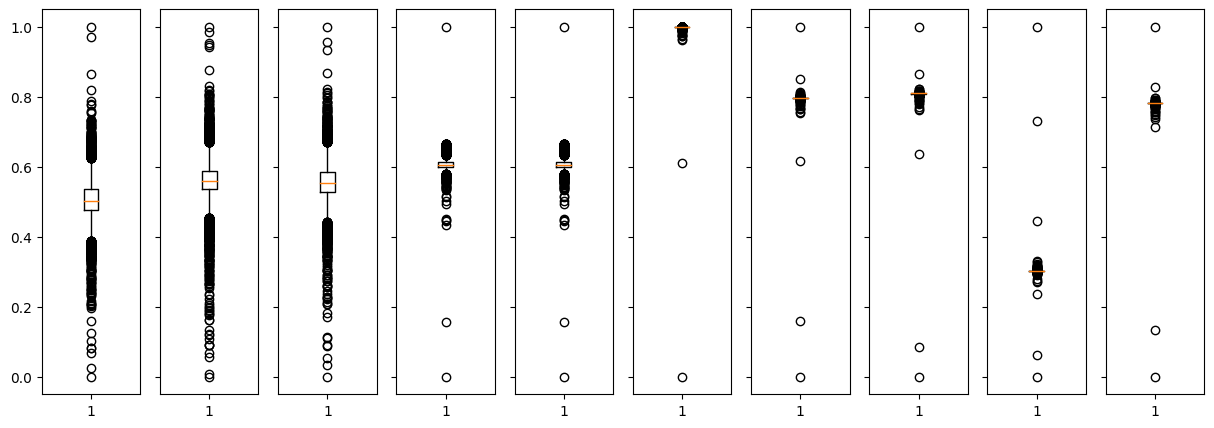

In [12]:
fig, ax = plt.subplots(1, len(data.columns) - 1, sharey=True, figsize = (15, 5))

for i, col in enumerate([i for i in data.columns if i != 'Bankrupt?']):
  ax[i].boxplot(data[col])

##The extremely unbalanced dataset would make the logistic regression unable to learn properly from the dataset, so we would have to resample and balance the dataset.

##Data Preprocessing

In [13]:
df_majority = data[data['Bankrupt?'] == 0]
df_minority = data[data['Bankrupt?'] == 1]

In [14]:
print(len(df_majority))
print(len(df_minority))

6599
220


In [15]:
# Downsize the Majority class

df_downsize = resample( # resample shuffles the data by default which is good
                      df_majority,
                      replace=False,
                      n_samples=len(df_minority), #downsizing to the length of the minority
                      random_state= 0
)

In [16]:
len(df_downsize)

220

In [17]:
# Combining the downsized and minority
df_balanced = pd.concat([df_downsize, df_minority])
df_balanced

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,0.786079
613,0,0.527568,0.603958,0.570587,0.617204,0.617204,0.999137,0.797677,0.809534,0.303675,0.781729
3301,0,0.560328,0.633450,0.622517,0.594683,0.594683,0.998961,0.797430,0.809354,0.303611,0.781615
6479,0,0.522157,0.593000,0.581134,0.640568,0.640568,0.999152,0.797580,0.809498,0.303473,0.781764
6216,0,0.530298,0.563127,0.576905,0.623805,0.623805,0.999136,0.797539,0.809453,0.303436,0.781724
...,...,...,...,...,...,...,...,...,...,...,...
6591,1,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,0.781254
6640,1,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388
6641,1,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340
6642,1,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,0.780733


In [18]:
df_balanced.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.500000,0.462363,0.508357,0.507994,0.603674,0.603682,0.998874,0.797038,0.808907,0.303109,0.781226
std,0.500569,0.088018,0.105127,0.094296,0.015131,0.015105,0.000540,0.002312,0.003003,0.003686,0.002265
min,0.000000,0.000000,0.000000,0.000000,0.532906,0.532906,0.991888,0.757216,0.761550,0.235090,0.742704
25%,0.000000,0.431227,0.474651,0.474289,0.596717,0.596870,0.998855,0.797107,0.809046,0.303271,0.781293
50%,0.500000,0.473553,0.534916,0.523636,0.601864,0.601868,0.998968,0.797374,0.809301,0.303466,0.781541
75%,1.000000,0.505984,0.562882,0.556226,0.610307,0.610244,0.999042,0.797477,0.809392,0.303536,0.781648
max,1.000000,1.000000,0.947067,0.957760,0.665151,0.665151,0.999534,0.801987,0.813800,0.313415,0.786079


In [19]:
x = df_balanced.drop('Bankrupt?', axis=1)
y = df_balanced['Bankrupt?']


##Splitting the dataset

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [25]:
scaled = StandardScaler()
x_s_train = scaled.fit_transform(x_train)
x_s_test = scaled.transform(x_test)

In [29]:
x_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
3452,0.589724,0.626363,0.637347,0.612296,0.612296,0.999191,0.797777,0.809666,0.303737,0.781945
6219,0.572661,0.614315,0.609294,0.613406,0.613377,0.999166,0.797662,0.809515,0.303588,0.781795
1132,0.433384,0.486372,0.482039,0.604405,0.604405,0.998902,0.797033,0.808975,0.303042,0.781253
2523,0.482085,0.548790,0.536271,0.643105,0.643105,0.999113,0.797389,0.809315,0.303223,0.781507
5729,0.504607,0.569341,0.552813,0.605882,0.605882,0.999023,0.797602,0.809482,0.303782,0.781751
...,...,...,...,...,...,...,...,...,...,...
3992,0.586311,0.652638,0.646234,0.622061,0.622061,0.999210,0.797682,0.809591,0.303531,0.781871
2027,0.417540,0.470726,0.460892,0.600852,0.600852,0.998935,0.797160,0.809086,0.303195,0.781327
4635,0.391703,0.417248,0.437015,0.599555,0.599555,0.998822,0.797155,0.809095,0.303422,0.781336
628,0.475308,0.539850,0.527384,0.605796,0.605796,0.998980,0.797378,0.809301,0.303482,0.781558


##EDA

<Axes: xlabel='Bankrupt?'>

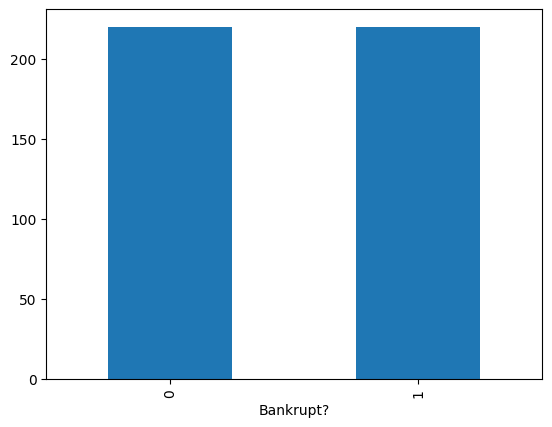

In [22]:
df_balanced['Bankrupt?'].value_counts().plot(kind= 'bar')

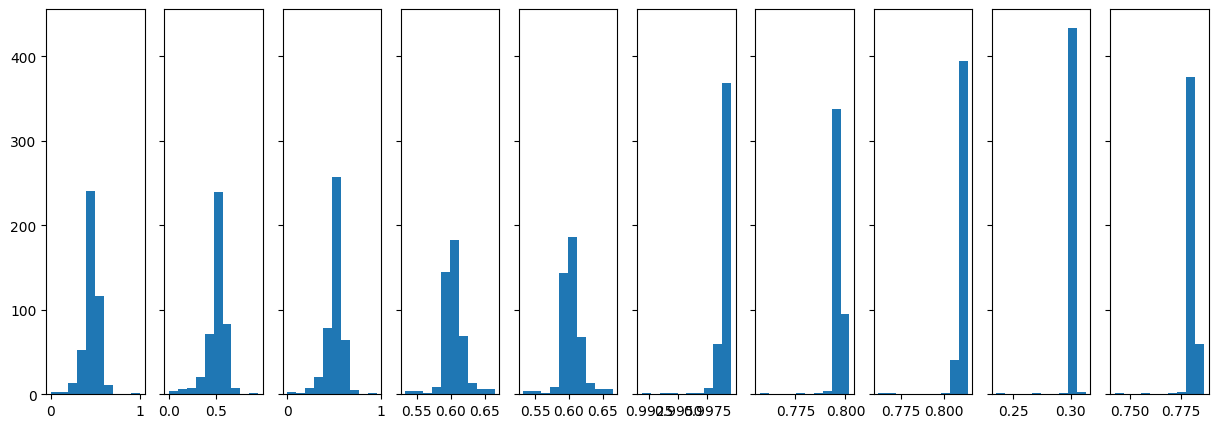

In [23]:
fig, ax = plt.subplots(1, len(df_balanced.columns) - 1, sharey=True, figsize = (15, 5))

for i, col in enumerate(x.columns):
  ax[i].hist(df_balanced[col], bins = 10)

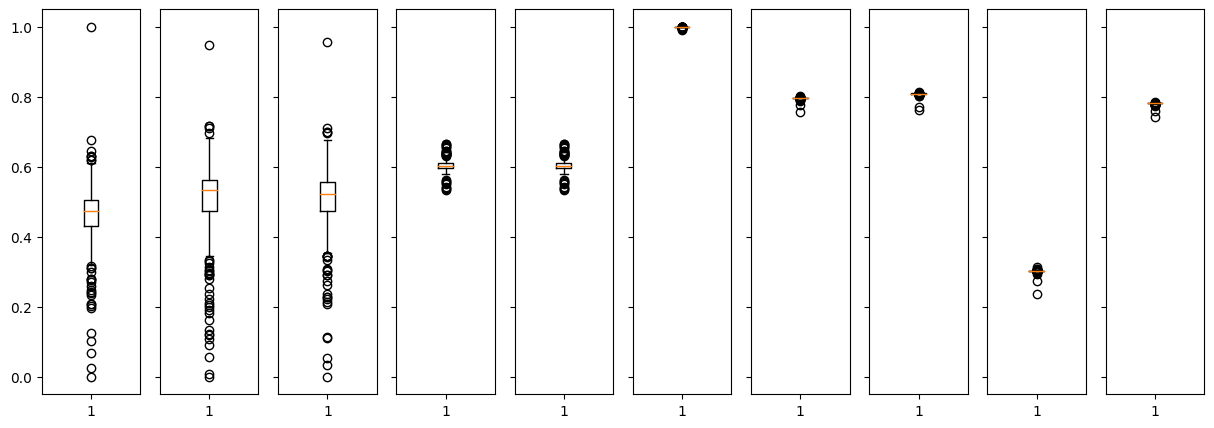

In [24]:
fig, ax = plt.subplots(1, len(df_balanced.columns) - 1, sharey=True, figsize = (15, 5))

for i, col in enumerate(x.columns):
  ax[i].boxplot(df_balanced[col])

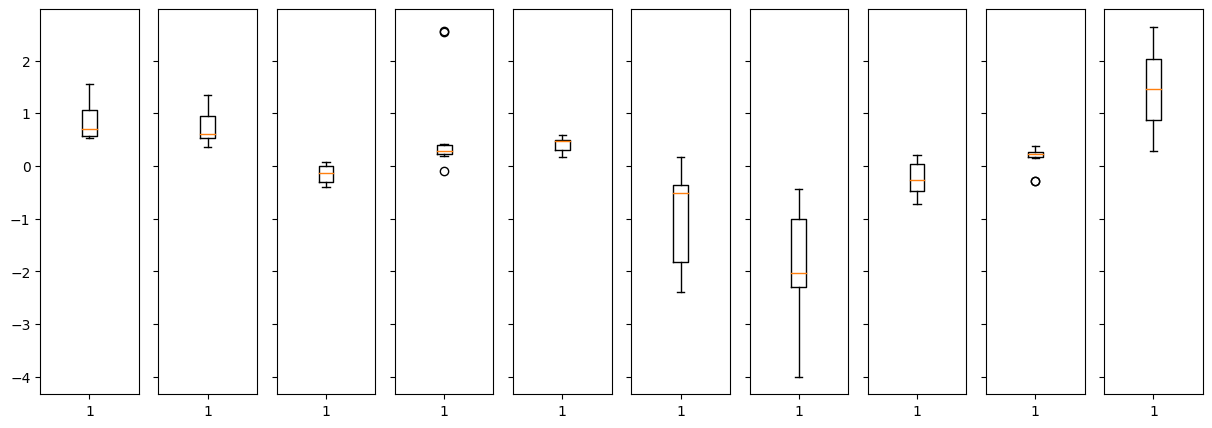

In [33]:
# Train set

fig, ax = plt.subplots(1, len(df_balanced.columns) - 1, sharey=True, figsize = (15, 5))

for i, col in enumerate(x.columns):
  ax[i].boxplot(x_s_train[i])

##Training the Logistic Regression Model

In [35]:
lr = LogisticRegression(random_state=0)
lr.fit(x_s_train, y_train)

LogisticRegression(random_state=0)

##Predicting the Test set

In [38]:
pred = lr.predict(x_s_test)

df = pd.DataFrame({'True': y_test, "predictions":pred, 'Result':y_test + pred})
df #0 or 2 is a correct prediction

,True,predictions,Result
2899,0,0,0
856,0,0,0
4679,1,1,2
6591,1,1,2
2045,1,1,2
...,...,...,...
2711,0,0,0
1949,1,1,2
5898,1,1,2
1930,0,0,0


##Results

In [40]:
print(accuracy_score(y_test, pred))

0.7727272727272727


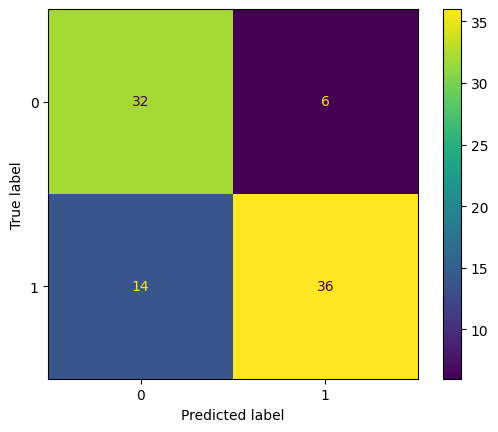

In [42]:
_ = ConfusionMatrixDisplay.from_estimator(lr, x_s_test, y_test)